In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import leastsq

In [2]:
# 各源的截断频率及BH质量

log_f_mrk335 = [-3.87521, -4.95430, -4.85337]
log_f_mrk766 = [-3.38894, -4.73420, -3.31576]
log_f_pg1211 = [-3.90284, -4.75402]
log_f_1h0707 = [-3.68377, -3.86556, -3.95457]
log_f_iras13224 = [-6.21722, -7.66262, -7.26717]
log_f_ngc3516 = [-6.43944, -7.71933]

log_m_mrk335 = [7.23, 7.23, 7.23]
log_m_mrk766 = [6.2, 6.2, 6.2]
log_m_pg1211 = [7.6, 7.6]
log_m_1h0707 = [6.3, 6.3, 6.3]
log_m_iras13224 = [6.8, 6.8, 6.8]
log_m_ngc3516 = [7.4, 7.4]

Fit result: A = -1.083843035692104 ; E = 2.3868773925935947 .
Standard deviation: sigma_A = 0.7047749978020013 ; sigma_E = 4.841221638603554 .


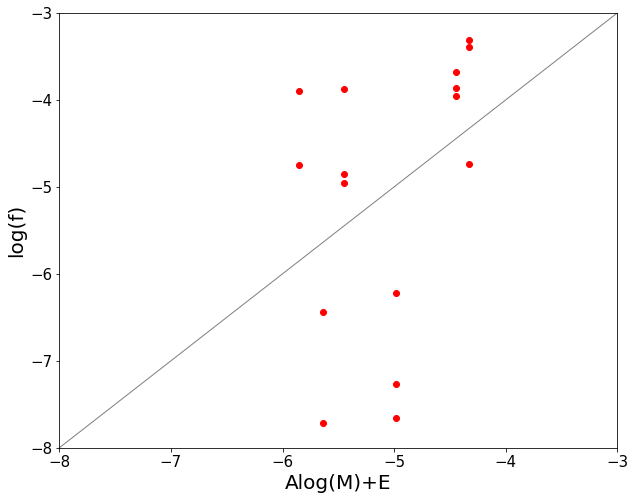

In [3]:
# 拟合参数

def fm(log_m, a, e):   # log(f)=a*log(m)+e
    return (a * log_m + e)

x = log_m_mrk335 + log_m_mrk766 + log_m_pg1211 + log_m_1h0707 + log_m_iras13224 + log_m_ngc3516
y = log_f_mrk335 + log_f_mrk766 + log_f_pg1211 + log_f_1h0707 + log_f_iras13224 + log_f_ngc3516


popt, pcov = curve_fit(fm, x, y)   
# popt返回模型最优参数。pcov对角线元素值代表每个参数的方差
perr = np.sqrt(np.diag(pcov))
# perr输出参数标准差
print ('Fit result: A =', popt[0], ';',
       'E =', popt[1], '.')
print ('Standard deviation: sigma_A =', perr[0], ';',
       'sigma_E =', perr[1], '.')


# 拟合参数对应的点
y_fit = []
for i in range(len(x)):
    y_fit.append(popt[0]*x[i]+popt[1])

# 用于画y=x参考线
x0 = np.linspace(-10,0,100)


plt.figure(figsize=(10,8))
plt.scatter(y_fit, y, color="r", linewidth=1)
plt.plot(x0, x0, color="k", alpha=0.5, linewidth=1)
plt.xlabel("Alog(M)+E", fontsize=20)
plt.ylabel("log(f)", fontsize=20)
plt.xlim(-8,-3)
plt.ylim(-8,-3)
plt.tick_params(labelsize=15)
plt.show()

Fit result (1): A = -1.3221784023084615 ; E = 3.997968910558198 .
Standard deviation (1): sigma_A = 1.1113757025655735 ; sigma_E = 7.411325364275786 .
Fit result (2): A = -0.5762200527001378 ; E = -1.2985740722003585 .
Standard deviation (2): sigma_A = 1.3644941164179083 ; sigma_E = 9.812123297975603 .


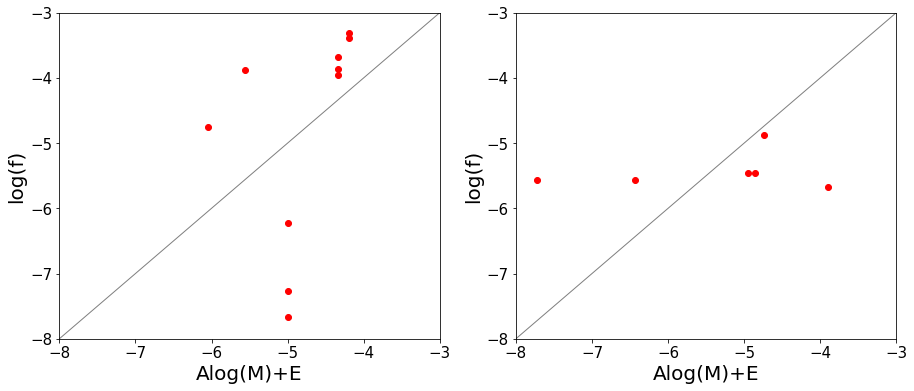

In [4]:
# 按PSD的不同形状分别拟合参数

x_1 = [log_m_mrk335[0], log_m_mrk766[0], log_m_mrk766[2], log_m_pg1211[1],
       log_m_1h0707[0], log_m_1h0707[1], log_m_1h0707[2], log_m_iras13224[0],
       log_m_iras13224[1], log_m_iras13224[2]]
y_1 = [log_f_mrk335[0], log_f_mrk766[0], log_f_mrk766[2], log_f_pg1211[1],
       log_f_1h0707[0], log_f_1h0707[1], log_f_1h0707[2], log_f_iras13224[0],
       log_f_iras13224[1], log_f_iras13224[2]]
x_2 = [log_m_mrk335[1], log_m_mrk335[2], log_m_mrk766[1], log_m_pg1211[0],
       log_m_ngc3516[0], log_m_ngc3516[1]]
y_2 = [log_f_mrk335[1], log_f_mrk335[2], log_f_mrk766[1], log_f_pg1211[0],
       log_f_ngc3516[0], log_f_ngc3516[1]]

popt_1, pcov_1 = curve_fit(fm, x_1, y_1)
perr_1 = np.sqrt(np.diag(pcov_1))
print ('Fit result (1): A =', popt_1[0], ';',
       'E =', popt_1[1], '.')
print ('Standard deviation (1): sigma_A =', perr_1[0], ';',
       'sigma_E =', perr_1[1], '.')

popt_2, pcov_2 = curve_fit(fm, x_2, y_2)
perr_2 = np.sqrt(np.diag(pcov_2))
print ('Fit result (2): A =', popt_2[0], ';',
       'E =', popt_2[1], '.')
print ('Standard deviation (2): sigma_A =', perr_2[0], ';',
       'sigma_E =', perr_2[1], '.')


# 拟合参数对应的点
y_1_fit = []
for i in range(len(x_1)):
    y_1_fit.append(popt_1[0]*x_1[i]+popt_1[1])
y_2_fit = []
for i in range(len(x_2)):
    y_2_fit.append(popt_2[0]*x_2[i]+popt_2[1])

# 用于画y=x参考线
x0 = np.linspace(-10,0,100)


fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.scatter(y_1_fit, y_1, color="r", linewidth=1)
ax1.plot(x0, x0, color="k", alpha=0.5, linewidth=1)
ax1.set_xlabel("Alog(M)+E", fontsize=20)
ax1.set_ylabel("log(f)", fontsize=20)
ax1.set_xlim(-8,-3)
ax1.set_ylim(-8,-3)
ax1.tick_params(labelsize=15)

ax2.scatter(y_2, y_2_fit, color="r", linewidth=1)
ax2.plot(x0, x0, color="k", alpha=0.5, linewidth=1)
ax2.set_xlabel("Alog(M)+E", fontsize=20)
ax2.set_ylabel("log(f)", fontsize=20)
ax2.set_xlim(-8,-3)
ax2.set_ylim(-8,-3)
ax2.tick_params(labelsize=15)

plt.show()

In [5]:
# 各源的热光度

log_l_mrk335 = [44.7, 44.7, 44.7]
log_l_mrk766 = [44.1, 44.1, 44.1]
log_l_pg1211 = [45.8, 45.8]
log_l_1h0707 = [44.4, 44.4, 44.4]
log_l_iras13224 = [42.8, 42.8, 42.8]
log_l_ngc3516 = [44.3, 44.3]

Fit result: A = -2.2071160631399858 ; B = 1.5468886044061327 ; E = -58.38856126755708 .
Standard deviation: sigma_A = 0.40101525303850105 ; sigma_B = 0.24276935737612745 ; sigma_E = 9.85380466635122 .


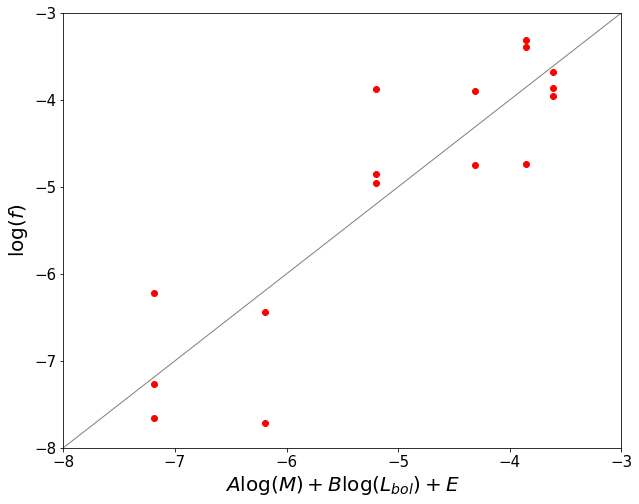

In [6]:
# 考虑热光度，拟合参数

def fml(x, a, b, e):   # log(f)=a*log(m)+b*log(l)+e
    log_m, log_l = x
    return (a * log_m + b * log_l + e)

x_m = log_m_mrk335 + log_m_mrk766 + log_m_pg1211 + log_m_1h0707 + log_m_iras13224 + log_m_ngc3516
x_l = log_l_mrk335 + log_l_mrk766 + log_l_pg1211 + log_l_1h0707 + log_l_iras13224 + log_l_ngc3516
x = [x_m, x_l]
y = log_f_mrk335 + log_f_mrk766 + log_f_pg1211 + log_f_1h0707 + log_f_iras13224 + log_f_ngc3516


popt, pcov = curve_fit(fml, x, y)   
# popt返回模型最优参数。pcov对角线元素值代表每个参数的方差
perr = np.sqrt(np.diag(pcov))
# perr输出参数标准差
print ('Fit result: A =', popt[0], ';',
       'B =', popt[1], ';', 
       'E =', popt[2], '.')
print ('Standard deviation: sigma_A =', perr[0], ';',
       'sigma_B =', perr[1], ';', 
       'sigma_E =', perr[2], '.')


# 拟合参数对应的点
y_fit = []
for i in range(len(x_m)):
    y_fit.append(popt[0]*x_m[i]+popt[1]*x_l[i]+popt[2])

# 用于画y=x参考线
x0 = np.linspace(-10,0,100)


plt.figure(figsize=(10,8))
plt.scatter(y_fit, y, color="r", linewidth=1)
plt.plot(x0, x0, color="k", alpha=0.5, linewidth=1)
plt.xlabel(r"$A\log(M)+B\log(L_{bol})+E$", fontsize=20)
plt.ylabel(r"$\log(f)$", fontsize=20)
plt.xlim(-8,-3)
plt.ylim(-8,-3)
plt.tick_params(labelsize=15)
plt.show()

Fit result: A = -1.650583282392184 ; B = 2.5563257895935743 ; E = -103.58812877505414 .
Standard deviation: sigma_A = 0.5312274348874098 ; sigma_B = 0.686941864165449 ; sigma_E = 28.69162925373369 .


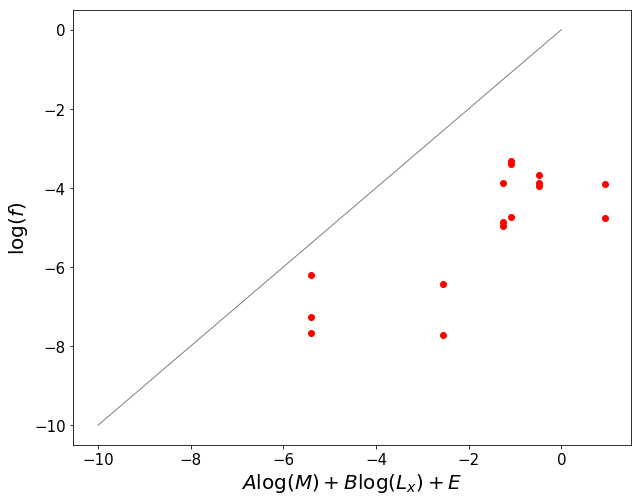

In [7]:
# 考虑X-ray光度，拟合参数

# 各源的X-ray光度
log_lx_mrk335 = [43.27, 43.27, 43.27]
log_lx_mrk766 = [43.16, 43.16, 43.16]
log_lx_pg1211 = [43.70, 43.70] 
log_lx_1h0707 = [42.67, 42.67, 42.67] 
log_lx_iras13224 = [42.704, 42.704, 42.704] 
log_lx_ngc3516 = [42.39, 42.39] 

x_m = log_m_mrk335 + log_m_mrk766 + log_m_pg1211 + log_m_1h0707 + log_m_iras13224 + log_m_ngc3516
x_lx = log_lx_mrk335 + log_lx_mrk766 + log_lx_pg1211 + log_lx_1h0707 + log_lx_iras13224 + log_lx_ngc3516
x = [x_m, x_lx]
y = log_f_mrk335 + log_f_mrk766 + log_f_pg1211 + log_f_1h0707 + log_f_iras13224 + log_f_ngc3516


popt, pcov = curve_fit(fml, x, y)   
# popt返回模型最优参数。pcov对角线元素值代表每个参数的方差
perr = np.sqrt(np.diag(pcov))
# perr输出参数标准差
print ('Fit result: A =', popt[0], ';',
       'B =', popt[1], ';', 
       'E =', popt[2], '.')
print ('Standard deviation: sigma_A =', perr[0], ';',
       'sigma_B =', perr[1], ';', 
       'sigma_E =', perr[2], '.')


# 拟合参数对应的点
y_fit = []
for i in range(len(x_m)):
    y_fit.append(popt[0]*x_m[i]+popt[1]*x_l[i]+popt[2])

# 用于画y=x参考线
x0 = np.linspace(-10,0,100)


plt.figure(figsize=(10,8))
plt.scatter(y_fit, y, color="r", linewidth=1)
plt.plot(x0, x0, color="k", alpha=0.5, linewidth=1)
plt.xlabel(r"$A\log(M)+B\log(L_x)+E$", fontsize=20)
plt.ylabel(r"$\log(f)$", fontsize=20)
#plt.xlim(-8,-3)
#plt.ylim(-8,-3)
plt.tick_params(labelsize=15)
plt.show()